In [9]:
import pandas as pd              # data analysis
import numpy as np               # scientific computing
import seaborn as sn             # plotting
import matplotlib.pyplot as plt  # plotting
%matplotlib inline

from sklearn.linear_model import LogisticRegression # data modelling
from sklearn.metrics import accuracy_score, confusion_matrix 
import statsmodels.api as sm     # data modelling

# Modelling with standardized dataset

### Loading the datasets

In [10]:
ds_train = pd.read_csv('../dataset/final_train_std.csv')
ds_test = pd.read_csv('../dataset/final_test_std.csv')

In [11]:
ds_train.drop('Unnamed: 0', inplace = True, axis = 1)
ds_test.drop('Unnamed: 0', inplace = True, axis = 1)

In [12]:
ds_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,2,-0.268287,0,0,-0.409478,1,0,1,0
1,3,0.338144,0,0,-0.506807,1,0,1,0
2,2,1.020379,0,0,-0.409478,1,0,1,0
3,3,-0.344091,0,0,-0.507273,0,1,0,0
4,3,1.285693,0,0,-0.517052,1,0,0,0


In [13]:
ds_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,0.395737,0,0,-0.496637,1,1,0
1,893,3,1.360386,1,0,-0.511497,0,0,1
2,894,2,2.517965,0,0,-0.463335,1,1,0
3,895,3,-0.183053,0,0,-0.481704,1,0,1
4,896,3,-0.568912,1,1,-0.416740,0,0,1


### Creating a model

In [38]:
# sklearn
logreg = LogisticRegression()

In [48]:
x_train = ds_train.drop(['Survived', 'Parch'], axis = 1)
y_train = ds_train['Survived']

### Fitting a model

In [49]:
# sklearn
logreg.fit(x_train, y_train)

# statsmodels
model = sm.Logit(y_train, x_train).fit(method='ncg', max_iter=1000)

Optimization terminated successfully.
         Current function value: 0.546600
         Iterations: 7
         Function evaluations: 7
         Gradient evaluations: 7
         Hessian evaluations: 7


In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  680
Model:                          Logit   Df Residuals:                      673
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.2114
Time:                        08:53:48   Log-Likelihood:                -371.69
converged:                       True   LL-Null:                       -471.34
Covariance Type:            nonrobust   LLR p-value:                 2.669e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.2966      0.096      3.093      0.002       0.109       0.485
Age           -0.0833      0.098     -0.847      0.397      -0.276       0.109
SibSp         -0.2484      0.099     -2.501      0.012      -0.443      -0.054
Fare           1.1226      0.197      5.704      0.000       0.737       1.508
Sex_male      -2.0019      0.189    -10.603      0.000      -2.372      -1.632
Embarked_Q     0.5424      0.379      1.433      0.152      -0.199       1.284
Embarked_S     0.7297      0.228      3.205      0.001       0.283       1.176
==============================================================================
"""

### Predicting

In [51]:
# doing a prediction using x_train

# sklearn
y_train_predicted = logreg.predict(x_train)

# statsmodels
y_train_predicted_statsmodels = model.predict(x_train)

In [52]:
# sklearn
y_train_predicted = pd.DataFrame(y_train_predicted)

# statsmodels
y_train_predicted_statsmodels = pd.DataFrame(y_train_predicted_statsmodels)

In [53]:
# sklearn accuracy score 
accuracy_score(y_train, y_train_predicted)

0.7823529411764706

In [54]:
# statsmodels accuracy score 
accuracy_score(y_train, round(y_train_predicted_statsmodels))

0.7779411764705882

#### Creating a confusion matrix

In [55]:
confusionMatrix = confusion_matrix(y_train, y_train_predicted)
confusionMatrix

array([[269,  71],
       [ 77, 263]])

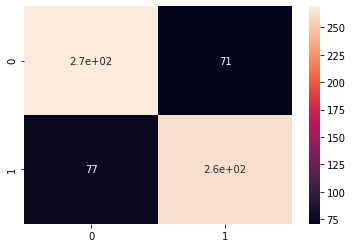

In [56]:
sn.heatmap(confusionMatrix, annot = True)
plt.show()

# Predicting test dataset for Kaggle submission

In [96]:
y_test_predicted = pd.DataFrame(logreg.predict(ds_test.drop('PassengerId', axis = 1)))

In [97]:
y_test_predicted.head(7)

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,1


In [98]:
ds_submission_result = ds_test['PassengerId'] 

In [99]:
ds_submission_result = pd.concat([ds_submission_result, y_test_predicted], axis = 1)

In [100]:
ds_submission_result.columns = ['PassengerId', 'Survived']
ds_submission_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [101]:
ds_submission_result.to_csv('../dataset/test_predicted.csv', index = False)

In [102]:
len(ds_submission_result)

418